# Student grades prediction

## Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
**Predict** - CGPA of a student based on different grades in four years.


Dataset Link-
•  https://github.com/dsrscientist/dataset4

•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [50]:
# Import important liberabry
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Importaning the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
# First first data
df.head(5)


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [52]:
# last five data
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [53]:
import regex as re
df['Seat No.'].str.count(r'(^CS.*)').sum()

571

In [54]:
df.columns.str.count(r'(^CS.*)').value_counts()

1    22
0    21
dtype: int64

There are 22 subject with CS code

In [55]:
df.columns.str.count(r'(^MT.*)').value_counts()

0    38
1     5
dtype: int64

There are 5 subject with MT code

In [56]:
df.columns.str.count(r'(^EL.*)').value_counts()

0    41
1     2
dtype: int64

There are 2 subject with EL code

In [57]:
df.columns.str.count(r'(^EE.*)').value_counts()

0    40
1     3
dtype: int64

There are 3 subject with EE code

All student are from CS department and there are total 571 student

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

There are 43 columns out of which 42(object) are features and 1(Float64) is label(CGPA).
- there are some missing values
- there are total 571 rows.

Total 41 subjects with 1 final CPGA and 1 Seat no. which contain branch code with Rollno.

In [59]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [60]:
df.nunique().to_frame()

,0
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [61]:
df['CS-312'].unique()

array(['C-', 'D+', 'B', 'B-', 'C', 'B+', 'C+', 'A-', 'D', nan, 'A', 'F',
       'A+', 'W', 'WU'], dtype=object)

In [62]:
df['CS-215'].unique()

array(['C-', 'D', 'A', 'A-', 'C+', 'C', 'B+', 'B-', 'D+', nan, 'B', 'A+',
       'WU', 'W', 'F'], dtype=object)


Letter Grade

Percentage	GPA

A+	97–100%	4.0

A	93–96%	3.9

A−	90–92%	3.7

B+	87–89%	3.3

B	83–86%	3.0

B−	80–82%	2.7

C+	77–79%	2.3

C	73–76%	2.0

C−	70–72%	1.7

D+	67–69%	1.3

D	63–66%	1.0

D−	60–62%	0.7

F	0–59%	0.0

W   withdraw admission

WU- Unautharized withdraw

I  “I” indicates that a portion of required coursework has not been completed and evaluated in the prescribed time period

In [63]:
max(df['CGPA'])

3.985

In [64]:
min(df['CGPA'])

0.8

In [65]:
for i in df.columns:
    x=df[i].value_counts()
    print(x.to_frame())

          Seat No.
CS-97001         1
CS-97384         1
CS-97378         1
CS-97379         1
CS-97380         1
...            ...
CS-97185         1
CS-97184         1
CS-97183         1
CS-97182         1
CS-97571         1

[571 rows x 1 columns]
    PH-121
A-     112
A      111
B+      61
B       57
B-      56
D       44
C       33
C+      31
D+      22
A+      22
C-      19
WU       2
F        1
    HS-101
A-      82
B-      78
C       68
B       63
B+      59
C-      50
C+      47
D       45
A       38
D+      36
A+       4
F        1
    CY-105
A      177
A-     120
B+      50
B       49
B-      42
D       31
A+      31
C       19
C+      17
C-      16
D+      14
WU       3
F        1
    HS-105/12
A          96
A-         75
B+         70
B          57
D          45
C          41
B-         40
C+         39
C-         36
D+         34
A+         34
WU          2
F           1
    MT-111
A-     105
A      100
B-      70
B+      62
B       55
C-      39
C+      33
C       30
D 

In [66]:
df['Roll No.']=df['Seat No.'].str.extract(r'(\d+)')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Roll No.
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,A-,A,C-,B,A-,2.205,97001
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,C,D,A-,B-,C,C,B,2.008,97002
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,A,C,A,A,A,A-,A,3.608,97003
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C,D+,C-,B-,B,C+,C+,C+,1.906,97004
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B+,B+,B-,A-,A,A-,A-,A,3.448,97005


In [67]:
# droping the Seat no column
df.drop('Seat No.',axis=1,inplace=True)

In [68]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Roll No.
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,A-,A,C-,B,A-,2.205,97001
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C,D,A-,B-,C,C,B,2.008,97002
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,A,C,A,A,A,A-,A,3.608,97003
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C,D+,C-,B-,B,C+,C+,C+,1.906,97004
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B+,B+,B-,A-,A,A-,A-,A,3.448,97005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A,A,A,B+,B+,B,A,3.798,97567
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,A,A,A-,B,A-,C,A-,3.772,97568
568,B,A,A-,B+,A,A,A,A,A,B,...,B,A,B+,A,C,B+,A-,A-,3.470,97569
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B,B,C-,D,C,B,B-,C,2.193,97570


### Encoding grades as per standards.

In [69]:
grade_to_gpa = {
    'A+': 4.0, 'A': 3.9, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0, 'W': 0.0, 'WU': 0.0, 'I': 0.0
}

In [70]:

j=1
for i in df.columns:
    if j <42:
        df[i] = df[i].map(grade_to_gpa)
    j+=1
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Roll No.
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,3.7,3.9,1.7,3.0,3.7,2.205,97001
1,3.9,1.0,1.3,1.0,2.7,2.0,1.0,3.9,1.3,1.0,...,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008,97002
2,3.9,3.0,3.9,2.7,3.3,3.9,2.7,3.3,3.7,3.7,...,3.0,3.9,2.0,3.9,3.9,3.9,3.7,3.9,3.608,97003
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906,97004
4,3.7,3.7,3.7,3.3,3.9,3.9,3.7,3.3,3.9,3.7,...,3.3,3.3,2.7,3.7,3.9,3.7,3.7,3.9,3.448,97005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,3.9,3.9,3.7,4.0,3.9,3.7,3.7,4.0,3.3,...,3.7,3.9,3.9,3.9,3.3,3.3,3.0,3.9,3.798,97567
567,4.0,3.9,3.9,3.9,3.9,3.9,3.9,3.7,3.9,3.9,...,3.3,3.9,3.9,3.7,3.0,3.7,2.0,3.7,3.772,97568
568,3.0,3.9,3.7,3.3,3.9,3.9,3.9,3.9,3.9,3.0,...,3.0,3.9,3.3,3.9,2.0,3.3,3.7,3.7,3.470,97569
569,3.9,3.3,1.0,3.9,1.0,1.3,2.7,1.7,2.7,1.7,...,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193,97570


In [71]:
df['CS-421'].unique()

array([1.7, 1. , 2. , 2.7, 2.3, 3.3, 1.3, 3. , nan, 3.9, 3.7, 0. , 4. ])

In [72]:
df['CS-421'].dtype

dtype('float64')

In [73]:
df.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
Roll No.      0
dtype: int64

### Treating the Null values

In [74]:
# Filtering all the columns which have less then or equal to 15 null values and not equal to zero.
df.columns[(df.isna().sum() <= 15) & (df.isna().sum() != 0)]

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-414', 'CS-419',
       'CS-423'],
      dtype='object')

In [75]:
# Using fillna to fill null with mode values.
for column in df[['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-414', 'CS-419',
       'CS-423']]:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

In [76]:
df.columns[df.isna().sum()>=15]

Index(['CS-406', 'CS-412'], dtype='object')

In [77]:
df.isna().sum()

PH-121        0
HS-101        0
CY-105        0
HS-105/12     0
MT-111        0
CS-105        0
CS-106        0
EL-102        0
EE-119        0
ME-107        0
CS-107        0
HS-205/20     0
MT-222        0
EE-222        0
MT-224        0
CS-210        0
CS-211        0
CS-203        0
CS-214        0
EE-217        0
CS-212        0
CS-215        0
MT-331        0
EF-303        0
HS-304        0
CS-301        0
CS-302        0
TC-383        0
MT-442        0
EL-332        0
CS-318        0
CS-306        0
CS-312        0
CS-317        0
CS-403        0
CS-421        0
CS-406       85
CS-414        0
CS-419        0
CS-423        0
CS-412       79
CGPA          0
Roll No.      0
dtype: int64

In [78]:
# Before Using Iterative Imputer, We need to Enable It Using Below Code
from sklearn.experimental import enable_iterative_imputer

# Import Iteravtive Imputer
from sklearn.impute import IterativeImputer
iter_impute =IterativeImputer()
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['CS-406','CS-414','CS-421', 'CS-419', 'CS-423']]),columns=['CS-406','CS-414','CS-421', 'CS-419', 'CS-423'])
iter_imp

,CS-406,CS-414,CS-421,CS-419,CS-423
0,3.7,3.9,1.7,1.7,3.0
1,3.7,2.7,1.0,2.0,2.0
2,3.9,3.9,2.0,3.9,3.7
3,2.7,3.0,1.7,2.3,2.3
4,3.7,3.9,2.7,3.7,3.7
...,...,...,...,...,...
566,3.9,3.3,3.9,3.3,3.0
567,3.7,3.0,3.9,3.7,2.0
568,3.9,2.0,3.3,3.3,3.7
569,1.0,2.0,1.7,3.0,2.7


In [79]:
iter_imp['CS-406'].unique()

array([3.7       , 3.9       , 2.7       , 3.        , 3.3       ,
       3.71618659, 2.3       , 1.        , 1.3       , 4.01534019,
       4.01917562, 3.96223213, 3.88599105, 3.90722509, 3.6231005 ,
       1.7       , 1.91504659, 3.52765864, 3.71353684, 3.89941505,
       3.85601601, 2.        , 3.94174886, 3.8886408 , 3.50541558,
       2.89156638, 2.96725385, 3.89571881, 3.38312572, 3.58064939,
       3.42096701, 3.675514  , 0.58747142, 3.70984061, 3.71751146,
       3.70408746, 3.88996567, 3.83114194, 3.57932452, 4.        ,
       3.61100138, 3.77635392, 3.58640254, 2.90764012, 3.69833432,
       3.59850166, 2.88270984, 3.63017852, 3.1638296 , 3.80100898,
       3.5239624 , 3.6416848 , 3.58507766, 3.07841437, 0.60089541,
       3.65131576, 3.63784937, 3.70851573, 2.88221557, 3.15542672,
       3.37538527, 2.89421612, 3.70276259, 3.62885365, 2.20119912,
       3.79717355, 3.68358545, 2.12493439, 0.        ])

In [80]:
# chaning the values to nearest catagorical value.
iter_imp[(iter_imp['CS-406']>0) & (iter_imp['CS-406']<0.5)]=0.0
iter_imp[(iter_imp['CS-406']>=0.5) & (iter_imp['CS-406']<1.15)]=1.0
iter_imp[(iter_imp['CS-406']>=1.15) & (iter_imp['CS-406']<1.5)]=1.3
iter_imp[(iter_imp['CS-406']>=1.5) & (iter_imp['CS-406']<1.85)]=1.7
iter_imp[(iter_imp['CS-406']>=1.85) & (iter_imp['CS-406']<2.15)]=2.0
iter_imp[(iter_imp['CS-406']>=2.15) & (iter_imp['CS-406']<2.5)]=2.3
iter_imp[(iter_imp['CS-406']>=2.5) & (iter_imp['CS-406']<2.85)]=2.7
iter_imp[(iter_imp['CS-406']>=2.85) & (iter_imp['CS-406']<3.15)]=3.0
iter_imp[(iter_imp['CS-406']>=3.15) & (iter_imp['CS-406']<3.5)]=3.3
iter_imp[(iter_imp['CS-406']>=3.5) & (iter_imp['CS-406']<3.8)]=3.7
iter_imp[(iter_imp['CS-406']>=3.8) & (iter_imp['CS-406']<3.95)]=3.9
iter_imp[iter_imp['CS-406']>=3.95 ]=0

In [81]:
iter_imp['CS-406'].unique()

array([3.7, 3.9, 2.7, 3. , 3.3, 2.3, 1. , 1.3, 0. , 1.7, 2. ])

In [82]:
iter_imp1=pd.DataFrame(iter_impute.fit_transform(df[['CS-412','CS-414','CS-421', 'CS-419', 'CS-423']]),columns=['CS-412','CS-414','CS-421', 'CS-419', 'CS-423'])
iter_imp1

,CS-412,CS-414,CS-421,CS-419,CS-423
0,3.7,3.9,1.7,1.7,3.0
1,3.0,2.7,1.0,2.0,2.0
2,3.9,3.9,2.0,3.9,3.7
3,2.3,3.0,1.7,2.3,2.3
4,3.9,3.9,2.7,3.7,3.7
...,...,...,...,...,...
566,3.9,3.3,3.9,3.3,3.0
567,3.7,3.0,3.9,3.7,2.0
568,3.7,2.0,3.3,3.3,3.7
569,2.0,2.0,1.7,3.0,2.7


In [83]:
iter_imp1['CS-412'].unique()

array([3.7       , 3.        , 3.9       , 2.3       , 3.3       ,
       1.7       , 2.7       , 3.70404549, 4.        , 2.        ,
       1.3       , 3.83728235, 1.61385605, 4.01729328, 3.72823093,
       3.33712775, 3.80869266, 3.81782932, 4.03248556, 4.00351313,
       3.74727688, 3.93243177, 3.42713321, 3.88491798, 3.9159492 ,
       3.73552673, 3.6133676 , 3.71404371, 3.81242448, 3.28769723,
       3.57526799, 3.09115866, 3.6102581 , 3.77189551, 2.95737122,
       3.79405095, 3.39148285, 3.40335484, 3.71715321, 3.0610679 ,
       3.62336582, 3.94621191, 3.57459557, 3.17683878, 2.8906007 ,
       3.95728963, 2.63935273, 0.47740808, 3.27769901, 3.29227343,
       3.29147915, 3.68942508, 3.87384026, 3.8235022 , 0.4968611 ,
       3.42240079, 0.        , 3.25832185, 3.63241355, 3.83998477,
       3.67121939, 3.41713499, 3.31064695, 3.3244271 , 3.64552127,
       3.30985268, 2.53511263, 1.24933243, 3.14938371, 3.45995931,
       3.12361829, 0.74810907, 0.49402466, 1.        ])

In [84]:
# chaning the values to nearest catagorical value.
iter_imp1[(iter_imp1['CS-412']>0) & (iter_imp1['CS-412']<0.5)]=0.0
iter_imp1[(iter_imp1['CS-412']>=0.5) & (iter_imp1['CS-412']<1.15)]=1.0
iter_imp1[(iter_imp1['CS-412']>=1.15) & (iter_imp1['CS-412']<1.5)]=1.3
iter_imp1[(iter_imp1['CS-412']>=1.5) & (iter_imp1['CS-412']<1.85)]=1.7
iter_imp1[(iter_imp1['CS-412']>=1.85) & (iter_imp1['CS-412']<2.15)]=2.0
iter_imp1[(iter_imp1['CS-412']>=2.15) & (iter_imp1['CS-412']<2.5)]=2.3
iter_imp1[(iter_imp1['CS-412']>=2.5) & (iter_imp1['CS-412']<2.85)]=2.7
iter_imp1[(iter_imp1['CS-412']>=2.85) & (iter_imp1['CS-412']<3.15)]=3.0
iter_imp1[(iter_imp1['CS-412']>=3.15) & (iter_imp1['CS-412']<3.5)]=3.3
iter_imp1[(iter_imp1['CS-412']>=3.5) & (iter_imp1['CS-412']<3.8)]=3.7
iter_imp1[(iter_imp1['CS-412']>=3.8) & (iter_imp1['CS-412']<3.95)]=3.9
iter_imp1[iter_imp1['CS-412']>=3.95 ]=0

In [85]:
iter_imp1['CS-412'].unique()

array([3.7, 3. , 3.9, 2.3, 3.3, 1.7, 2.7, 0. , 2. , 1.3, 1. ])

In [86]:
df['CS-406']=iter_imp['CS-406']
df['CS-412']=iter_imp1['CS-412']


In [87]:
df['CS-406'].unique()

array([3.7, 3.9, 2.7, 3. , 3.3, 2.3, 1. , 1.3, 0. , 1.7, 2. ])

In [88]:
df['CS-412'].unique()

array([3.7, 3. , 3.9, 2.3, 3.3, 1.7, 2.7, 0. , 2. , 1.3, 1. ])

In [89]:
df.nunique().to_frame()

,0
PH-121,12
HS-101,12
CY-105,12
HS-105/12,12
MT-111,12
CS-105,11
CS-106,12
EL-102,12
EE-119,12
ME-107,12


In [90]:
df['Roll No.'].unique()

array(['97001', '97002', '97003', '97004', '97005', '97006', '97007',
       '97008', '97009', '97010', '97011', '97012', '97013', '97014',
       '97015', '97016', '97017', '97018', '97019', '97020', '97021',
       '97022', '97023', '97024', '97025', '97026', '97027', '97028',
       '97029', '97030', '97031', '97032', '97033', '97034', '97035',
       '97036', '97037', '97038', '97039', '97040', '97041', '97042',
       '97043', '97044', '97045', '97046', '97047', '97048', '97049',
       '97050', '97051', '97052', '97053', '97054', '97055', '97056',
       '97057', '97058', '97059', '97060', '97061', '97062', '97063',
       '97064', '97065', '97066', '97067', '97068', '97069', '97070',
       '97071', '97072', '97073', '97074', '97075', '97076', '97077',
       '97078', '97079', '97080', '97081', '97082', '97083', '97084',
       '97085', '97086', '97087', '97088', '97089', '97090', '97091',
       '97092', '97093', '97094', '97095', '97096', '97097', '97098',
       '97099', '971

In [91]:
# Changing datatype fromobject to int
df['Roll No.'] = df['Roll No.'].astype('int64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [93]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Roll No.
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.978984,2.596848,3.224343,2.843958,2.963222,3.285639,2.935201,2.944483,2.995447,2.673205,...,2.673555,3.104904,2.482137,3.190368,3.392644,3.012785,2.959019,3.162522,2.954888,97286.000000
std,0.958753,0.901319,0.906460,1.001338,0.926517,0.789184,0.847351,0.955933,0.816140,1.004743,...,0.862931,0.843100,0.900816,0.914941,0.751850,0.733911,0.872606,0.883551,0.620552,164.977776
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,97001.000000
25%,2.300000,2.000000,2.850000,2.000000,2.300000,3.000000,2.700000,2.300000,2.300000,1.700000,...,2.000000,2.700000,2.000000,3.000000,3.150000,2.700000,2.300000,3.000000,2.538000,97143.500000
50%,3.300000,2.700000,3.700000,3.000000,3.300000,3.700000,3.000000,3.300000,3.300000,2.700000,...,2.700000,3.300000,2.700000,3.700000,3.700000,3.000000,3.300000,3.300000,3.029000,97286.000000
75%,3.700000,3.300000,3.900000,3.700000,3.700000,3.900000,3.700000,3.700000,3.700000,3.700000,...,3.300000,3.900000,3.000000,3.700000,3.900000,3.700000,3.700000,3.700000,3.451000,97428.500000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.900000,4.000000,4.000000,4.000000,3.900000,3.985000,97571.000000


All the columns are catagorical columns except the label and roll no.

## Graphical Analysis

### univareirnt Analysis

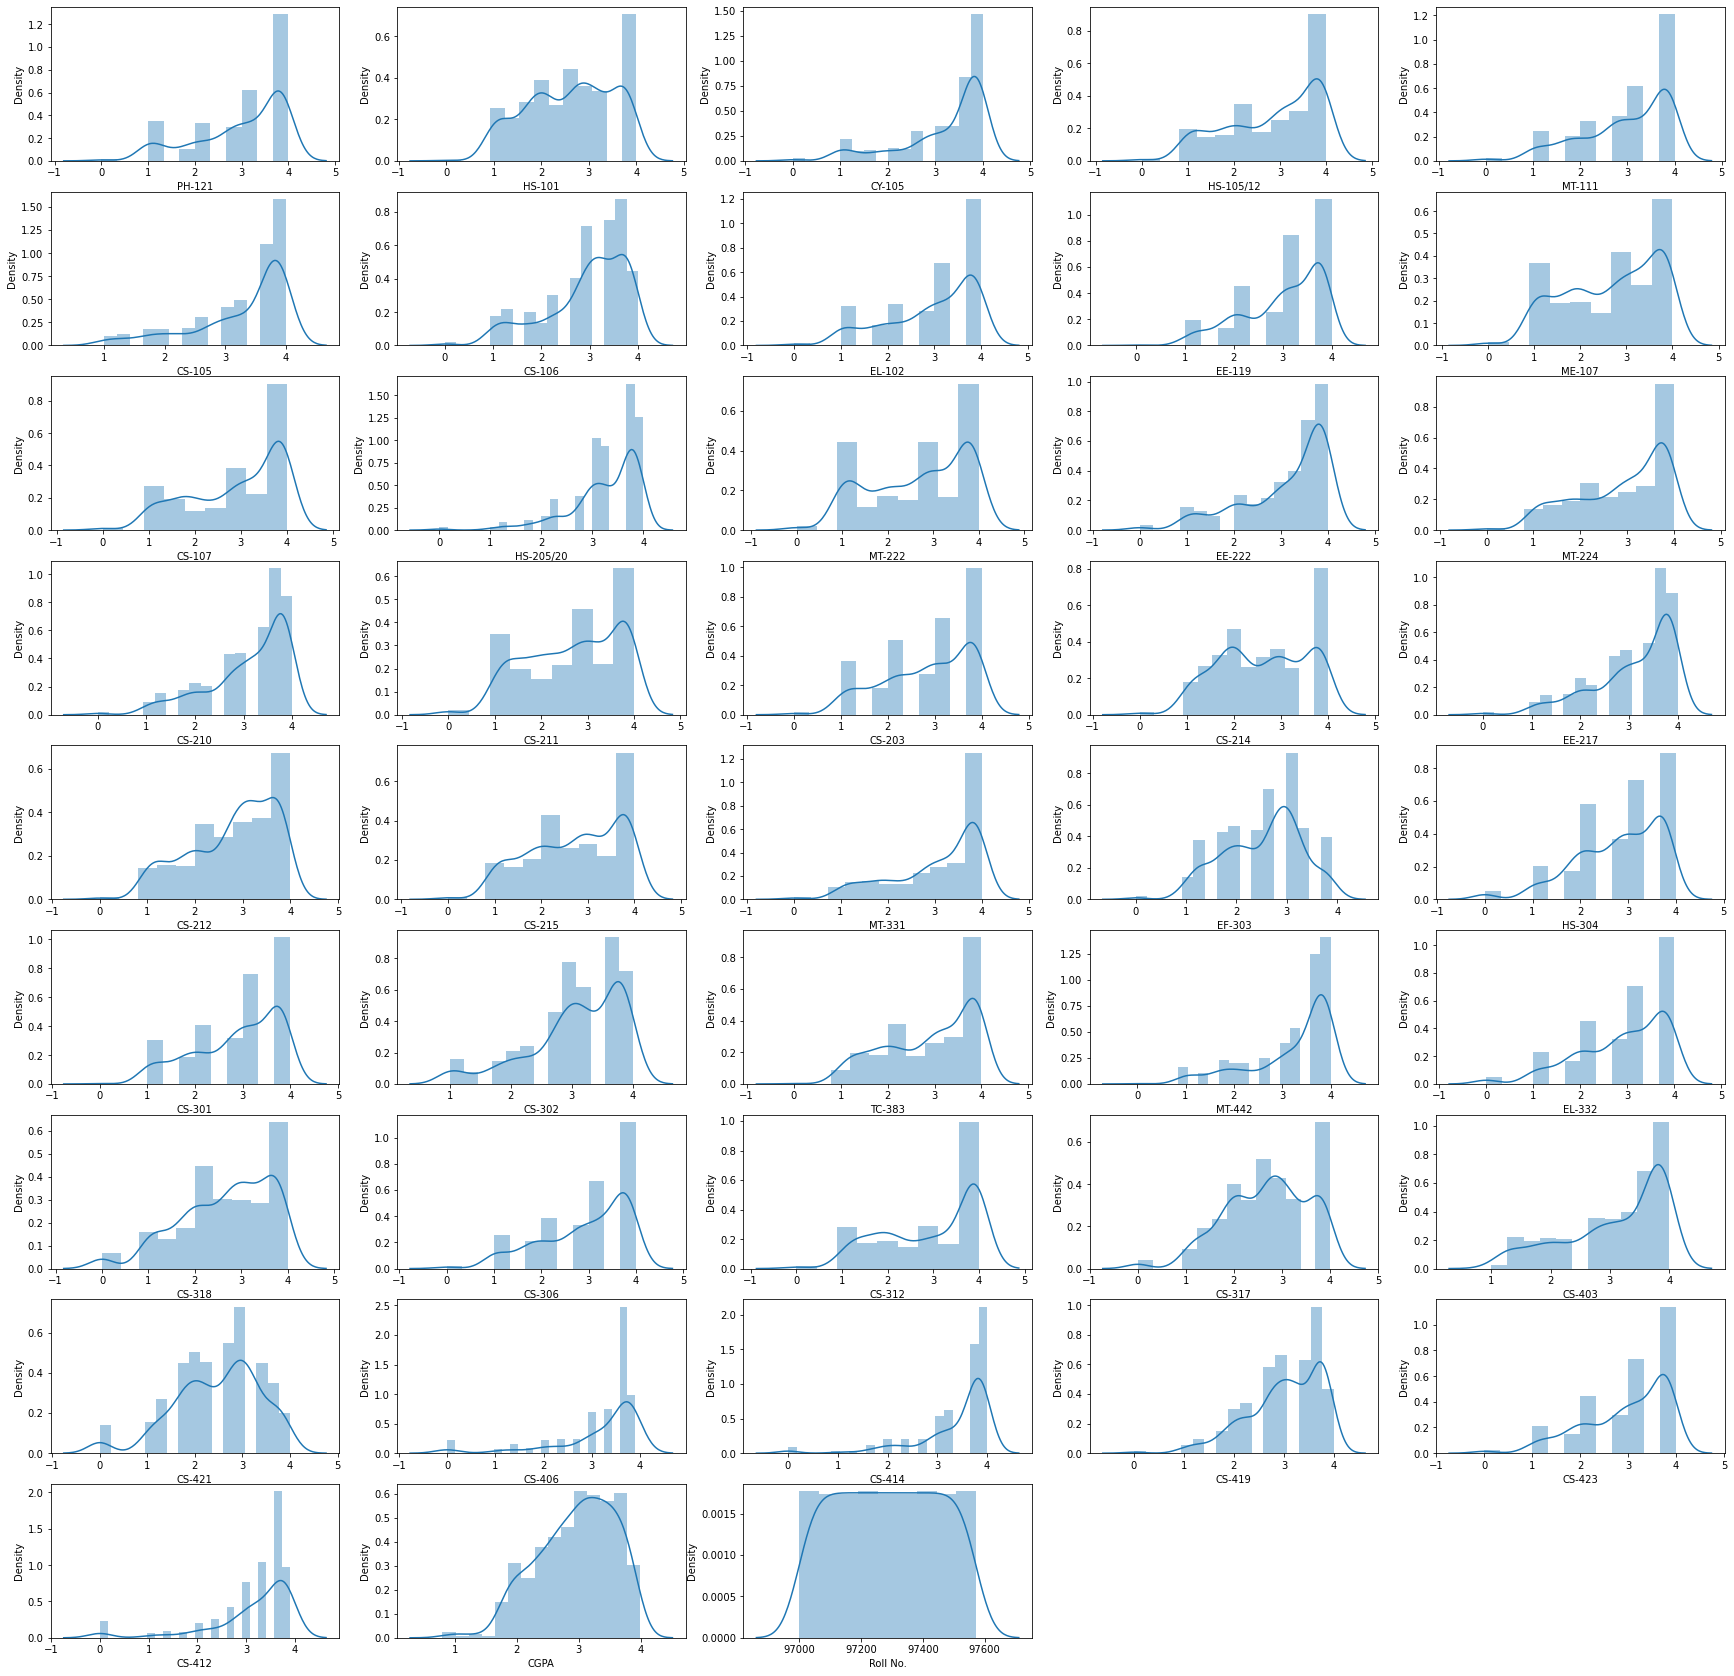

In [94]:
plt.figure(figsize=(30, 30))
j=1
for i in df.columns:
    if j <=43:
        ax=plt.subplot(9,5,j)
        sns.distplot(x=df[i])
        plt.xlabel(i)
    j+=1
plt.show()


Catagorical coloumns so we don't treat its skewness.

### Bivareirnt Analysis

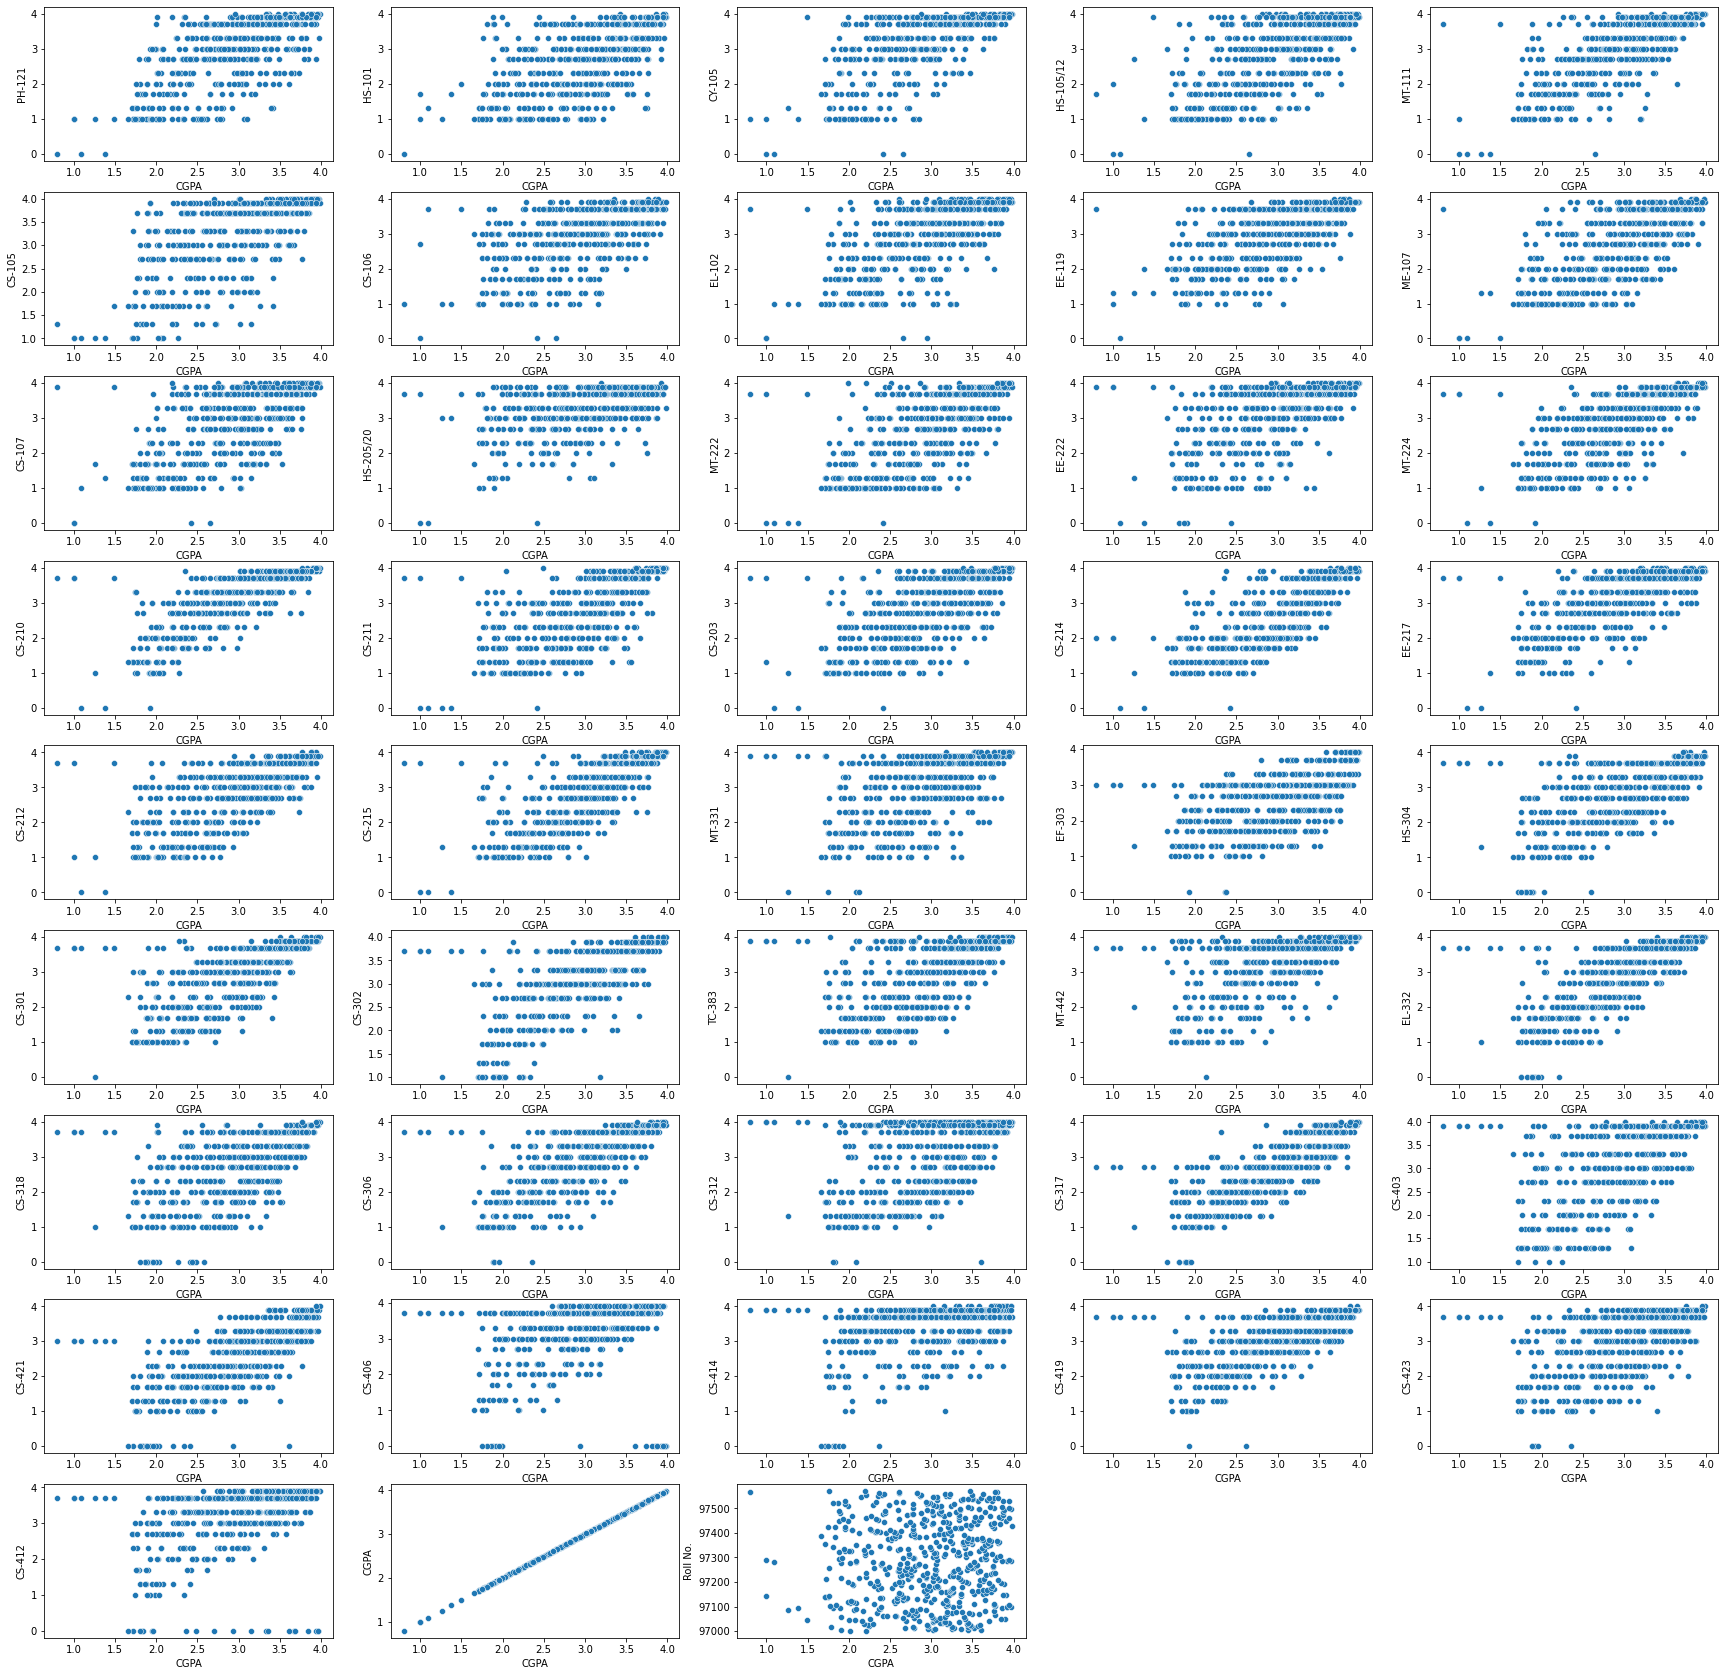

In [95]:
plt.figure(figsize=(30, 30))
j=1
for i in df.columns:
    if j <=43:
        ax=plt.subplot(9,5,j)
        sns.scatterplot(y=df[i],x=df['CGPA'])
        plt.ylabel(i)
        plt.xlabel('CGPA')
    j+=1
plt.show()

graphs shows linear relations

### Checking outliers 

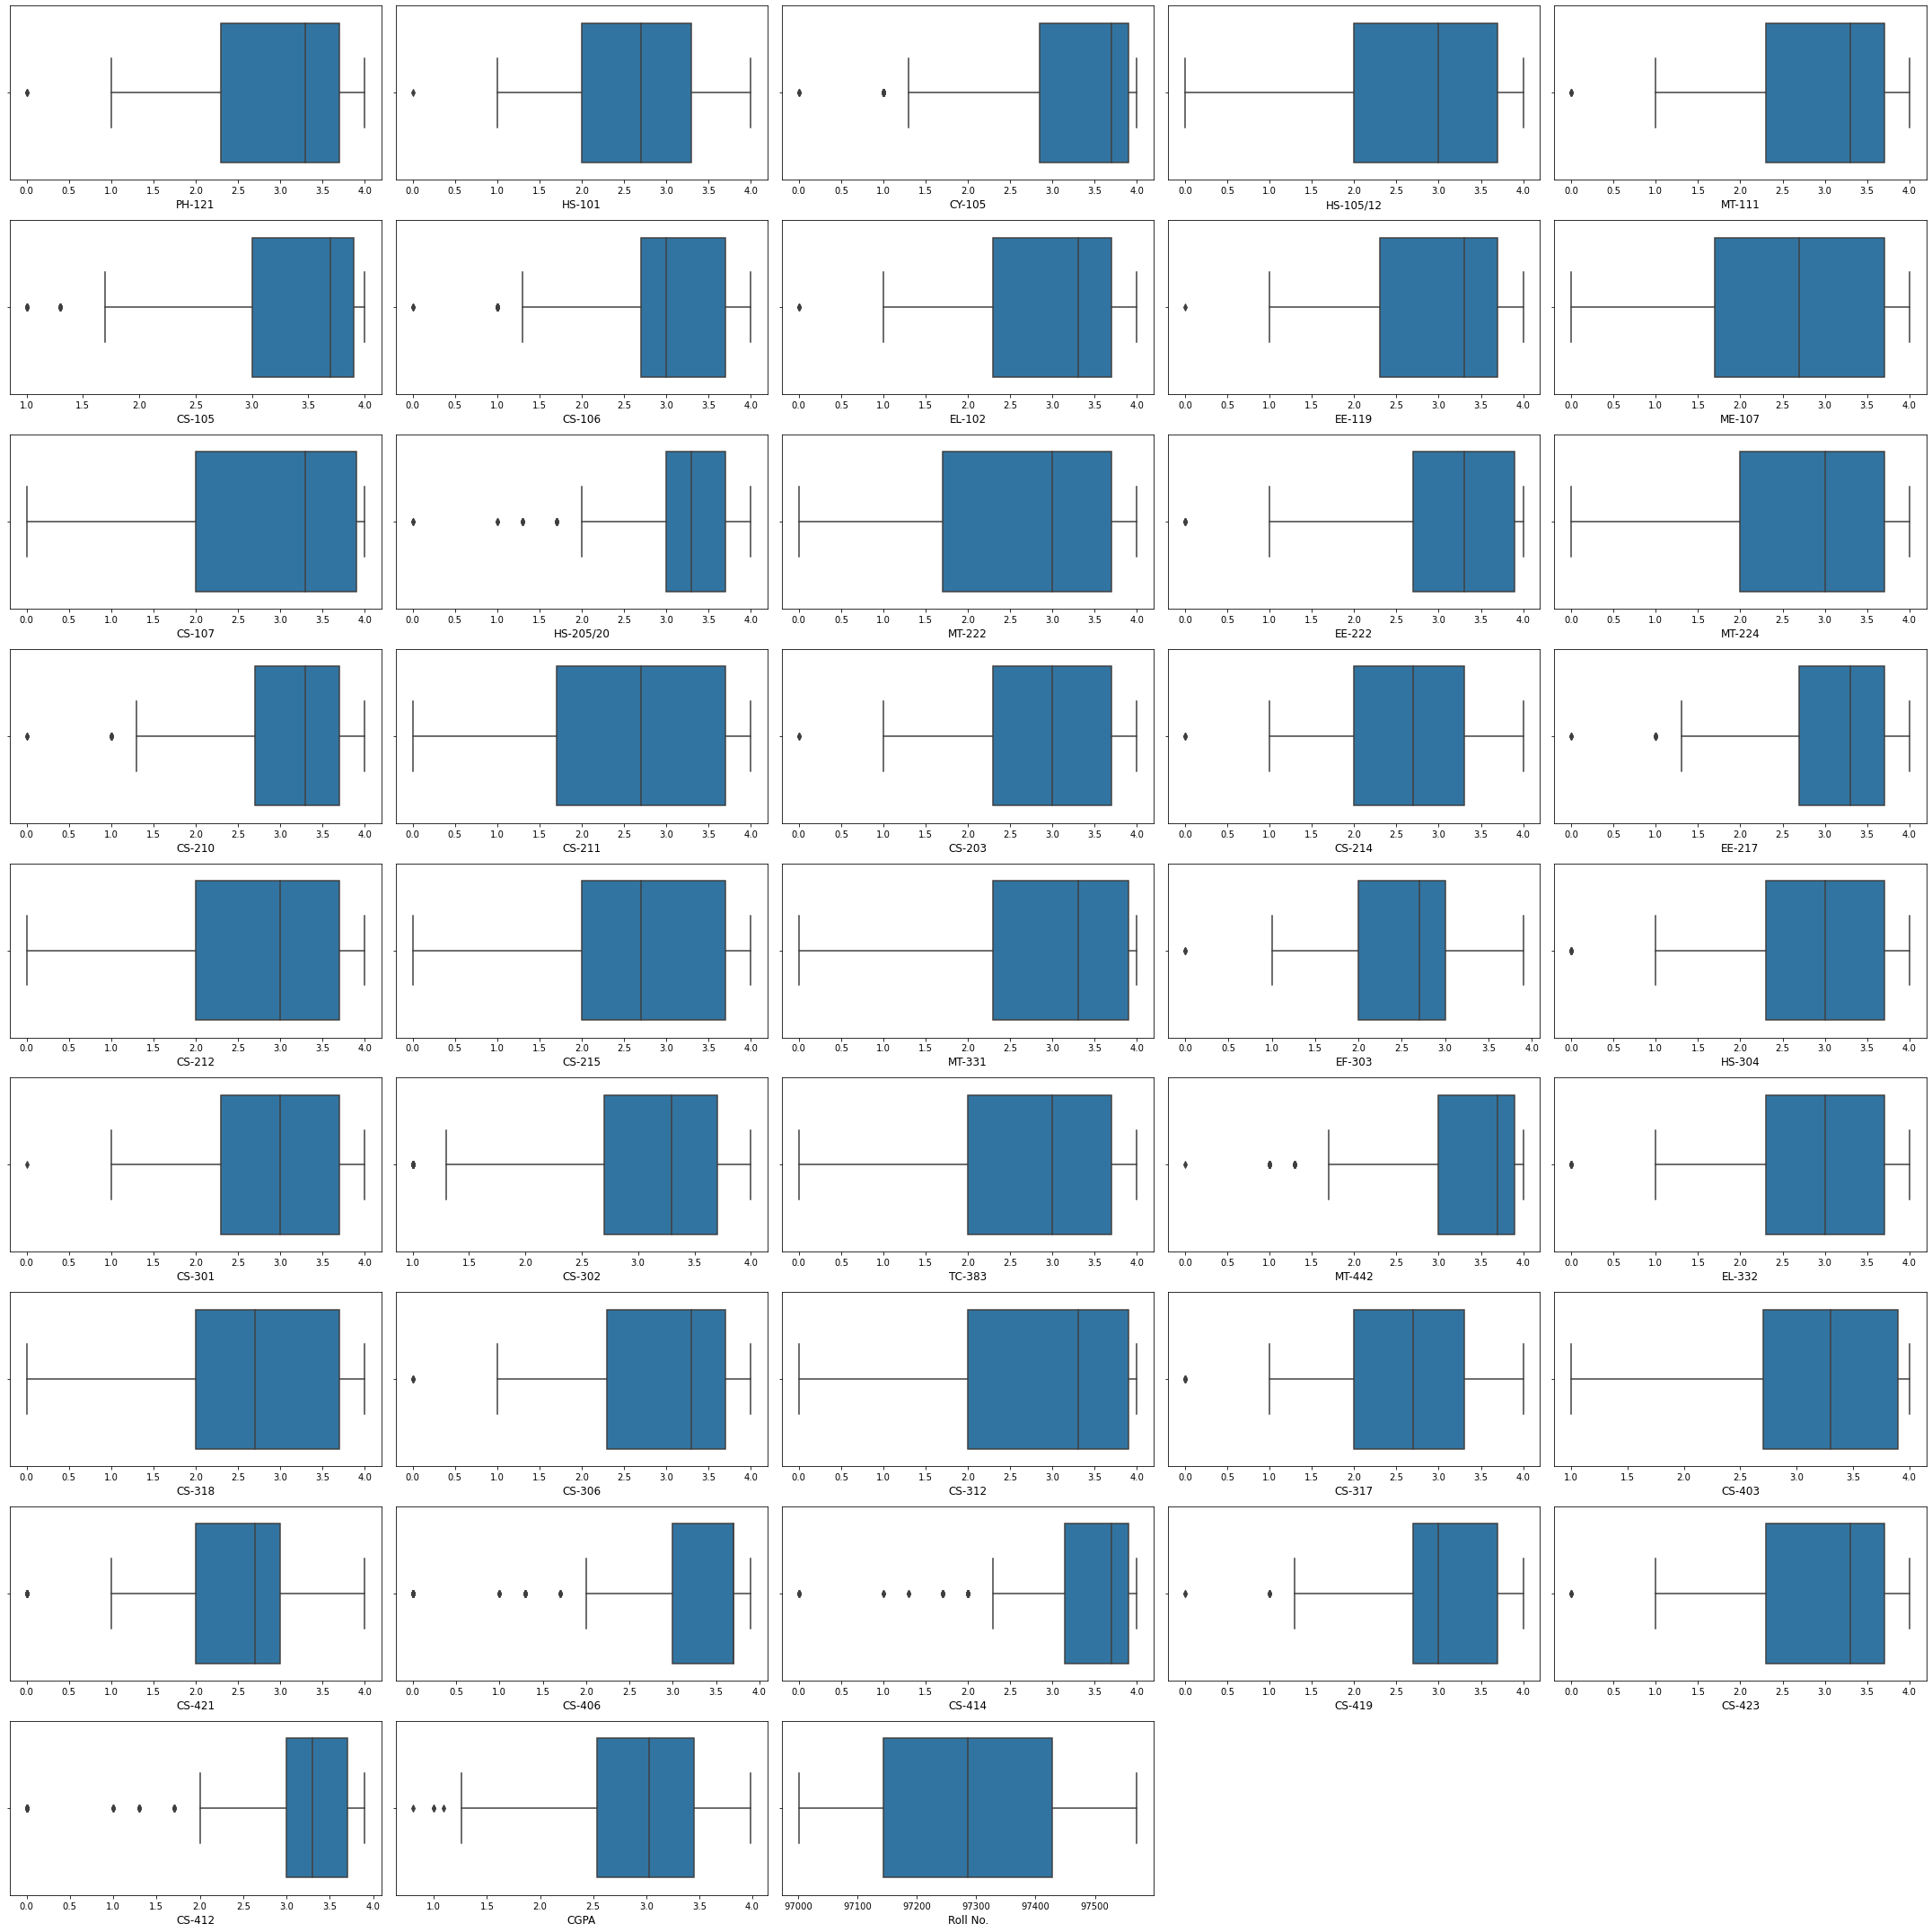

In [96]:

plt.figure(figsize=(30,30),facecolor="white")
plotnumber=1
for col in df.columns:
    if plotnumber<=43:
        ax=plt.subplot(9,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

As we can see we have few outliers but GPA can be low in some subject so it will not be treated as outliers.

### Skewness

In [97]:
# Checking skewness
df.skew()

PH-121      -0.902865
HS-101      -0.243004
CY-105      -1.428393
HS-105/12   -0.597150
MT-111      -0.856143
CS-105      -1.310255
CS-106      -0.985541
EL-102      -0.840954
EE-119      -0.814548
ME-107      -0.396836
CS-107      -0.664186
HS-205/20   -1.554586
MT-222      -0.415724
EE-222      -1.161472
MT-224      -0.692541
CS-210      -1.129045
CS-211      -0.345917
CS-203      -0.557236
CS-214      -0.149265
EE-217      -1.104977
CS-212      -0.637625
CS-215      -0.384661
MT-331      -0.961794
EF-303      -0.383845
HS-304      -0.817970
CS-301      -0.675311
CS-302      -1.018506
TC-383      -0.550792
MT-442      -1.288437
EL-332      -0.862663
CS-318      -0.667758
CS-306      -0.811084
CS-312      -0.551206
CS-317      -0.446909
CS-403      -0.836543
CS-421      -0.589465
CS-406      -1.995658
CS-414      -2.220404
CS-419      -0.876178
CS-423      -0.899552
CS-412      -2.021817
CGPA        -0.497203
Roll No.     0.000000
dtype: float64

As acceptable range is from -0.5 to 0.5

### Treating skewness

In [98]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

In [99]:
#transform the data to remove skewness 
from sklearn.preprocessing import power_transform
x=power_transform(x)

In [100]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA',
       'Roll No.'],
      dtype='object')

In [101]:
df1=pd.DataFrame(x, columns=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'Roll No.'])

In [102]:
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,Roll No.
0,-0.535211,-1.412278,-1.670884,-0.947331,-1.380776,-1.833252,-1.838079,-1.342431,-0.570652,-1.006247,...,-1.211111,-1.146936,-1.536749,-0.938178,0.631887,0.915214,-1.633391,-0.137311,0.719815,-1.729442
1,1.113656,-1.702340,-1.797231,-1.648282,-0.491921,-1.606257,-1.838079,1.146637,-1.741936,-1.574229,...,-1.482476,-1.792497,-1.346275,-1.574068,0.631887,-1.402319,-1.381269,-1.204216,-0.582755,-1.723371
2,1.113656,0.422490,0.913539,-0.291010,0.248171,0.944453,-0.511753,0.253617,0.929416,1.056464,...,-0.052828,0.328831,1.079949,-0.629378,1.130189,0.915214,1.434771,0.918724,1.203602,-1.717299
3,-1.730278,-0.368247,-1.797231,-1.648282,-1.774868,0.459572,-1.699382,-1.342431,-1.879958,-0.451425,...,-1.482476,-0.836804,-1.730431,-0.938178,-1.058044,-1.054443,-1.082279,-0.934695,-1.393832,-1.711228
4,0.784930,1.255198,0.479025,0.379971,1.157974,0.944453,1.021635,0.253617,1.307844,1.056464,...,-0.357262,0.715649,0.048975,0.169948,0.631887,0.915214,1.026232,0.918724,1.203602,-1.705157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.193226,1.500158,0.913539,0.882842,1.326888,0.944453,1.021635,0.829685,1.507586,0.597167,...,0.743139,1.256533,1.079949,1.778682,1.130189,-0.576176,0.294051,-0.137311,1.203602,1.704350
567,1.286623,1.500158,0.913539,1.150933,1.157974,0.944453,1.409726,0.829685,1.307844,1.294168,...,0.273671,0.715649,1.079949,1.778682,0.631887,-1.054443,1.026232,-1.204216,0.719815,1.710412
568,-0.193226,1.500158,0.479025,0.379971,1.157974,0.944453,1.409726,1.146637,1.307844,0.267239,...,0.743139,0.328831,1.079949,0.938122,1.130189,-1.861493,0.294051,0.918724,0.719815,1.716474
569,1.113656,0.774520,-1.857733,1.150933,-1.774868,-1.833252,-0.511753,-1.342431,-0.570652,-1.006247,...,-1.659301,0.328831,-0.366756,-0.938178,-2.018632,-1.861493,-0.184227,-0.509111,-1.625702,1.722537


In [103]:
df1.skew()

PH-121      -0.390358
HS-101      -0.134764
CY-105      -0.622123
HS-105/12   -0.294640
MT-111      -0.332116
CS-105      -0.532624
CS-106      -0.307705
EL-102      -0.354447
EE-119      -0.298669
ME-107      -0.214997
CS-107      -0.328748
HS-205/20   -0.367350
MT-222      -0.237615
EE-222      -0.486862
MT-224      -0.322322
CS-210      -0.390208
CS-211      -0.177124
CS-203      -0.237823
CS-214      -0.109019
EE-217      -0.383869
CS-212      -0.249258
CS-215      -0.191127
MT-331      -0.417489
EF-303      -0.105187
HS-304      -0.242815
CS-301      -0.274692
CS-302      -0.279144
TC-383      -0.272514
MT-442      -0.549917
EL-332      -0.295514
CS-318      -0.231464
CS-306      -0.320036
CS-312      -0.308903
CS-317      -0.114087
CS-403      -0.371705
CS-421      -0.127873
CS-406      -0.747450
CS-414      -0.702573
CS-419      -0.219183
CS-423      -0.323025
CS-412      -0.615768
Roll No.    -0.000510
dtype: float64

Now skewness is in accptebale range

### Checking the correlation

In [104]:
# Adding the label in new dataframe
df1['CGPA']=y

In [105]:
# checking the correlationbetween features and the target.
cor=df1.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,Roll No.,CGPA
PH-121,1.000000,0.393287,0.599379,0.536549,0.469523,0.672831,0.319395,0.408312,0.627188,0.567290,...,0.507324,0.317220,0.346305,0.302874,0.147900,0.466574,0.095194,0.336975,-0.084182,0.667673
HS-101,0.393287,1.000000,0.362822,0.486473,0.459699,0.435900,0.372735,0.365509,0.306578,0.351387,...,0.413974,0.244277,0.340954,0.276931,0.263410,0.296100,0.244919,0.250630,0.006392,0.558158
CY-105,0.599379,0.362822,1.000000,0.583690,0.559835,0.621089,0.389543,0.460921,0.533652,0.480867,...,0.520797,0.510188,0.423868,0.113411,-0.000559,0.493657,0.141784,0.139778,0.256553,0.684803
HS-105/12,0.536549,0.486473,0.583690,1.000000,0.513584,0.563261,0.523374,0.359026,0.429327,0.370346,...,0.515123,0.492325,0.456842,0.153284,0.112665,0.487465,0.226683,0.171840,0.257473,0.649600
MT-111,0.469523,0.459699,0.559835,0.513584,1.000000,0.418023,0.533091,0.573426,0.448604,0.487296,...,0.603271,0.437745,0.561089,0.290434,0.248384,0.534369,0.433338,0.287458,0.175413,0.746142
CS-105,0.672831,0.435900,0.621089,0.563261,0.418023,1.000000,0.300265,0.344547,0.574181,0.500607,...,0.431867,0.298168,0.297960,0.238899,0.129335,0.363210,0.040257,0.262614,-0.035939,0.634209
CS-106,0.319395,0.372735,0.389543,0.523374,0.533091,0.300265,1.000000,0.345513,0.298912,0.321676,...,0.451277,0.463946,0.448260,0.131815,0.127175,0.476667,0.363549,0.165683,0.282501,0.575745
EL-102,0.408312,0.365509,0.460921,0.359026,0.573426,0.344547,0.345513,1.000000,0.432878,0.451673,...,0.492985,0.323813,0.394424,0.244622,0.314343,0.364772,0.389873,0.292144,0.010737,0.643723
EE-119,0.627188,0.306578,0.533652,0.429327,0.448604,0.574181,0.298912,0.432878,1.000000,0.614692,...,0.488940,0.376100,0.410700,0.265864,0.200750,0.482369,0.241649,0.359288,-0.050215,0.657311
ME-107,0.567290,0.351387,0.480867,0.370346,0.487296,0.500607,0.321676,0.451673,0.614692,1.000000,...,0.487461,0.349655,0.408449,0.293627,0.168548,0.456978,0.221395,0.319335,-0.083155,0.676210


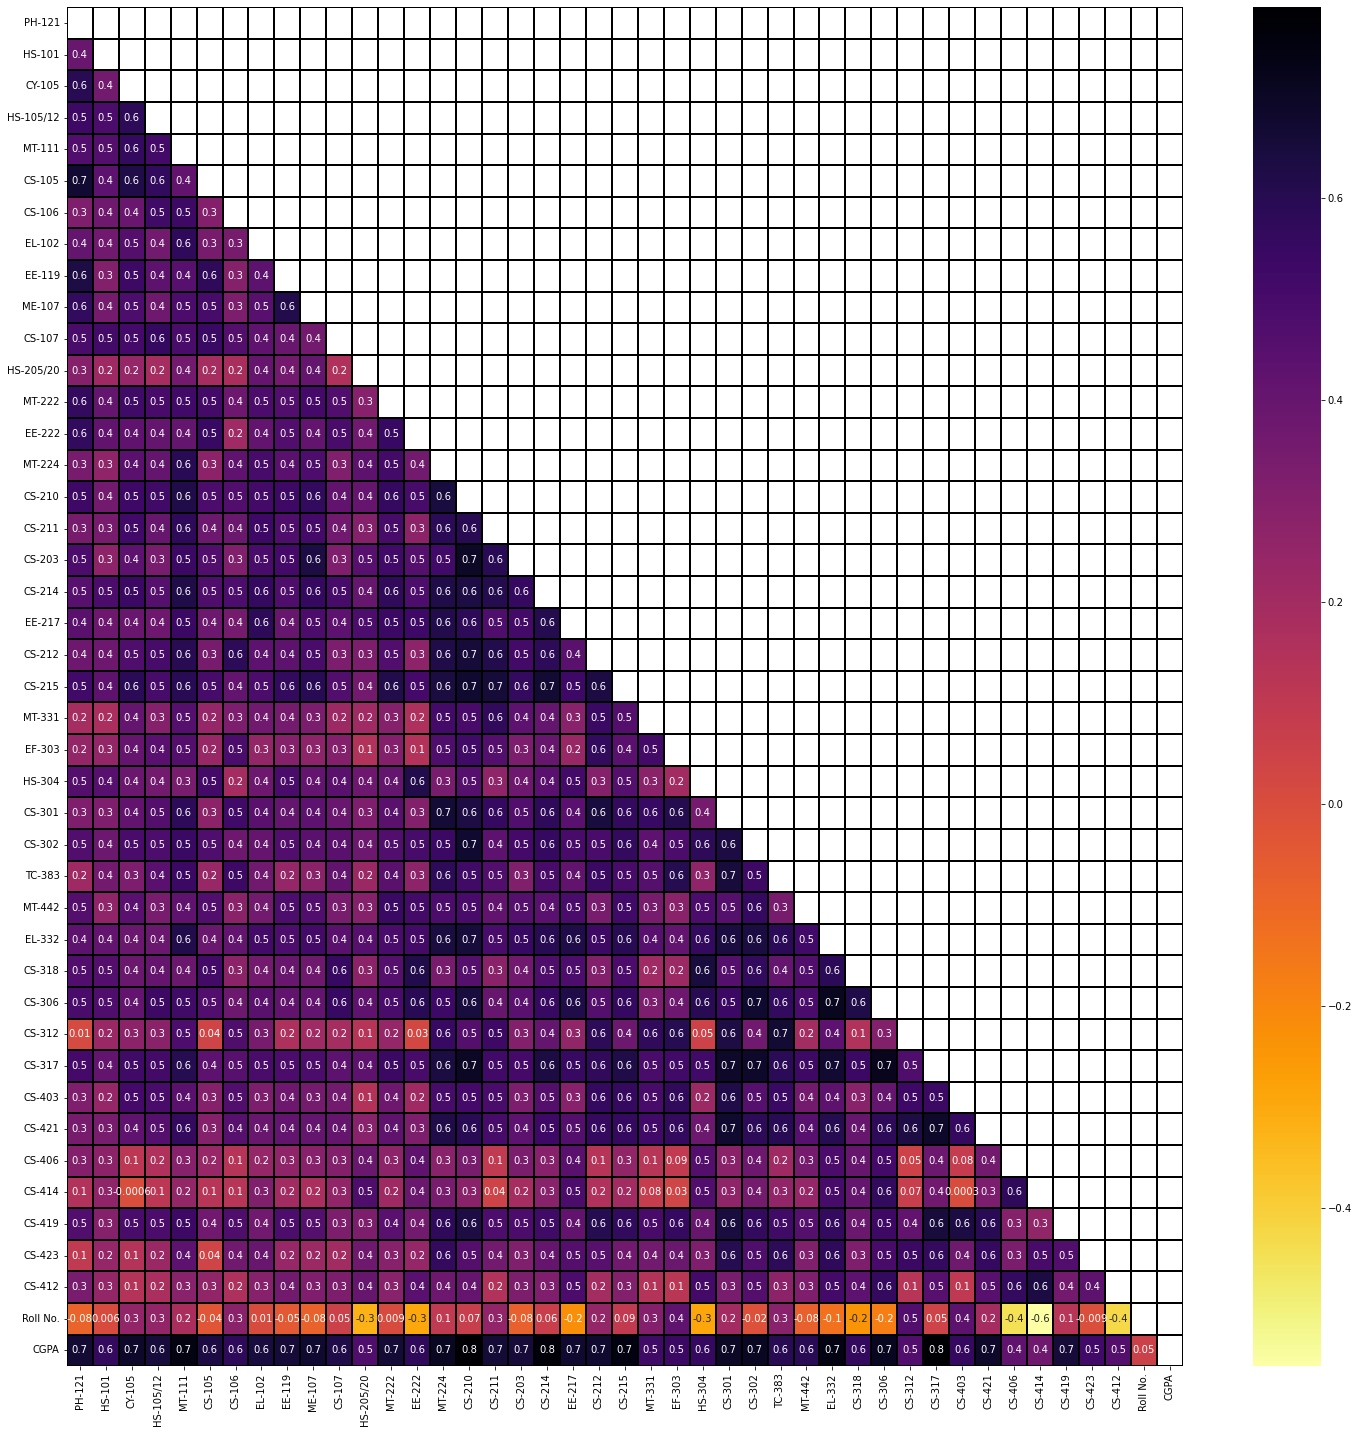

In [106]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df1.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

In [107]:
# correlation with target variable
df1.corr()['CGPA'].sort_values()

Roll No.     0.054343
CS-414       0.373181
CS-406       0.423188
CS-412       0.461829
CS-312       0.470734
HS-205/20    0.474264
CS-423       0.519212
MT-331       0.524807
EF-303       0.537703
CS-403       0.555737
HS-304       0.557508
HS-101       0.558158
CS-318       0.562307
CS-106       0.575745
EE-222       0.576391
MT-442       0.590425
TC-383       0.595168
CS-107       0.619083
CS-105       0.634209
EL-102       0.643723
HS-105/12    0.649600
CS-419       0.652754
CS-203       0.656040
EE-119       0.657311
CS-211       0.658661
MT-222       0.661833
PH-121       0.667673
EE-217       0.675490
ME-107       0.676210
CS-212       0.676781
CY-105       0.684803
CS-421       0.688363
CS-301       0.695304
CS-302       0.704940
MT-224       0.706459
CS-306       0.712679
EL-332       0.736773
MT-111       0.746142
CS-215       0.747731
CS-214       0.767415
CS-210       0.784171
CS-317       0.788934
CGPA         1.000000
Name: CGPA, dtype: float64

CS-406 and CS-412 is perfectly corelated and there are many feature high have high correlation

### PCA

In [108]:
x=df1.drop('CGPA',axis=1)
y=df1['CGPA']

In [109]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[ 5.81007319e+00,  3.02715155e+00,  2.25600944e+00, ...,
        -1.37282011e-01,  3.17671085e-01, -2.83485028e-01],
       [ 6.96472574e+00,  1.82706520e+00, -1.15412338e-01, ...,
        -1.52367331e-01,  1.08954404e-01,  9.35085234e-01],
       [-4.75434690e+00,  2.22814809e+00, -1.24131603e-01, ...,
         4.82074999e-04, -9.20102590e-02,  4.43423963e-01],
       ...,
       [-3.26775682e+00, -2.37178908e+00, -7.97831728e-01, ...,
         7.54815989e-01, -4.01881272e-02,  2.69762426e-01],
       [ 5.06260322e+00, -1.31989760e+00, -1.87948241e+00, ...,
         1.90743252e-01, -2.83811109e-01, -4.18457769e-01],
       [ 7.36078006e+00, -1.99697418e+00, -1.48440880e+00, ...,
        -2.74384000e-01,  1.66153969e-01, -5.94810774e-01]])

### Scree plot

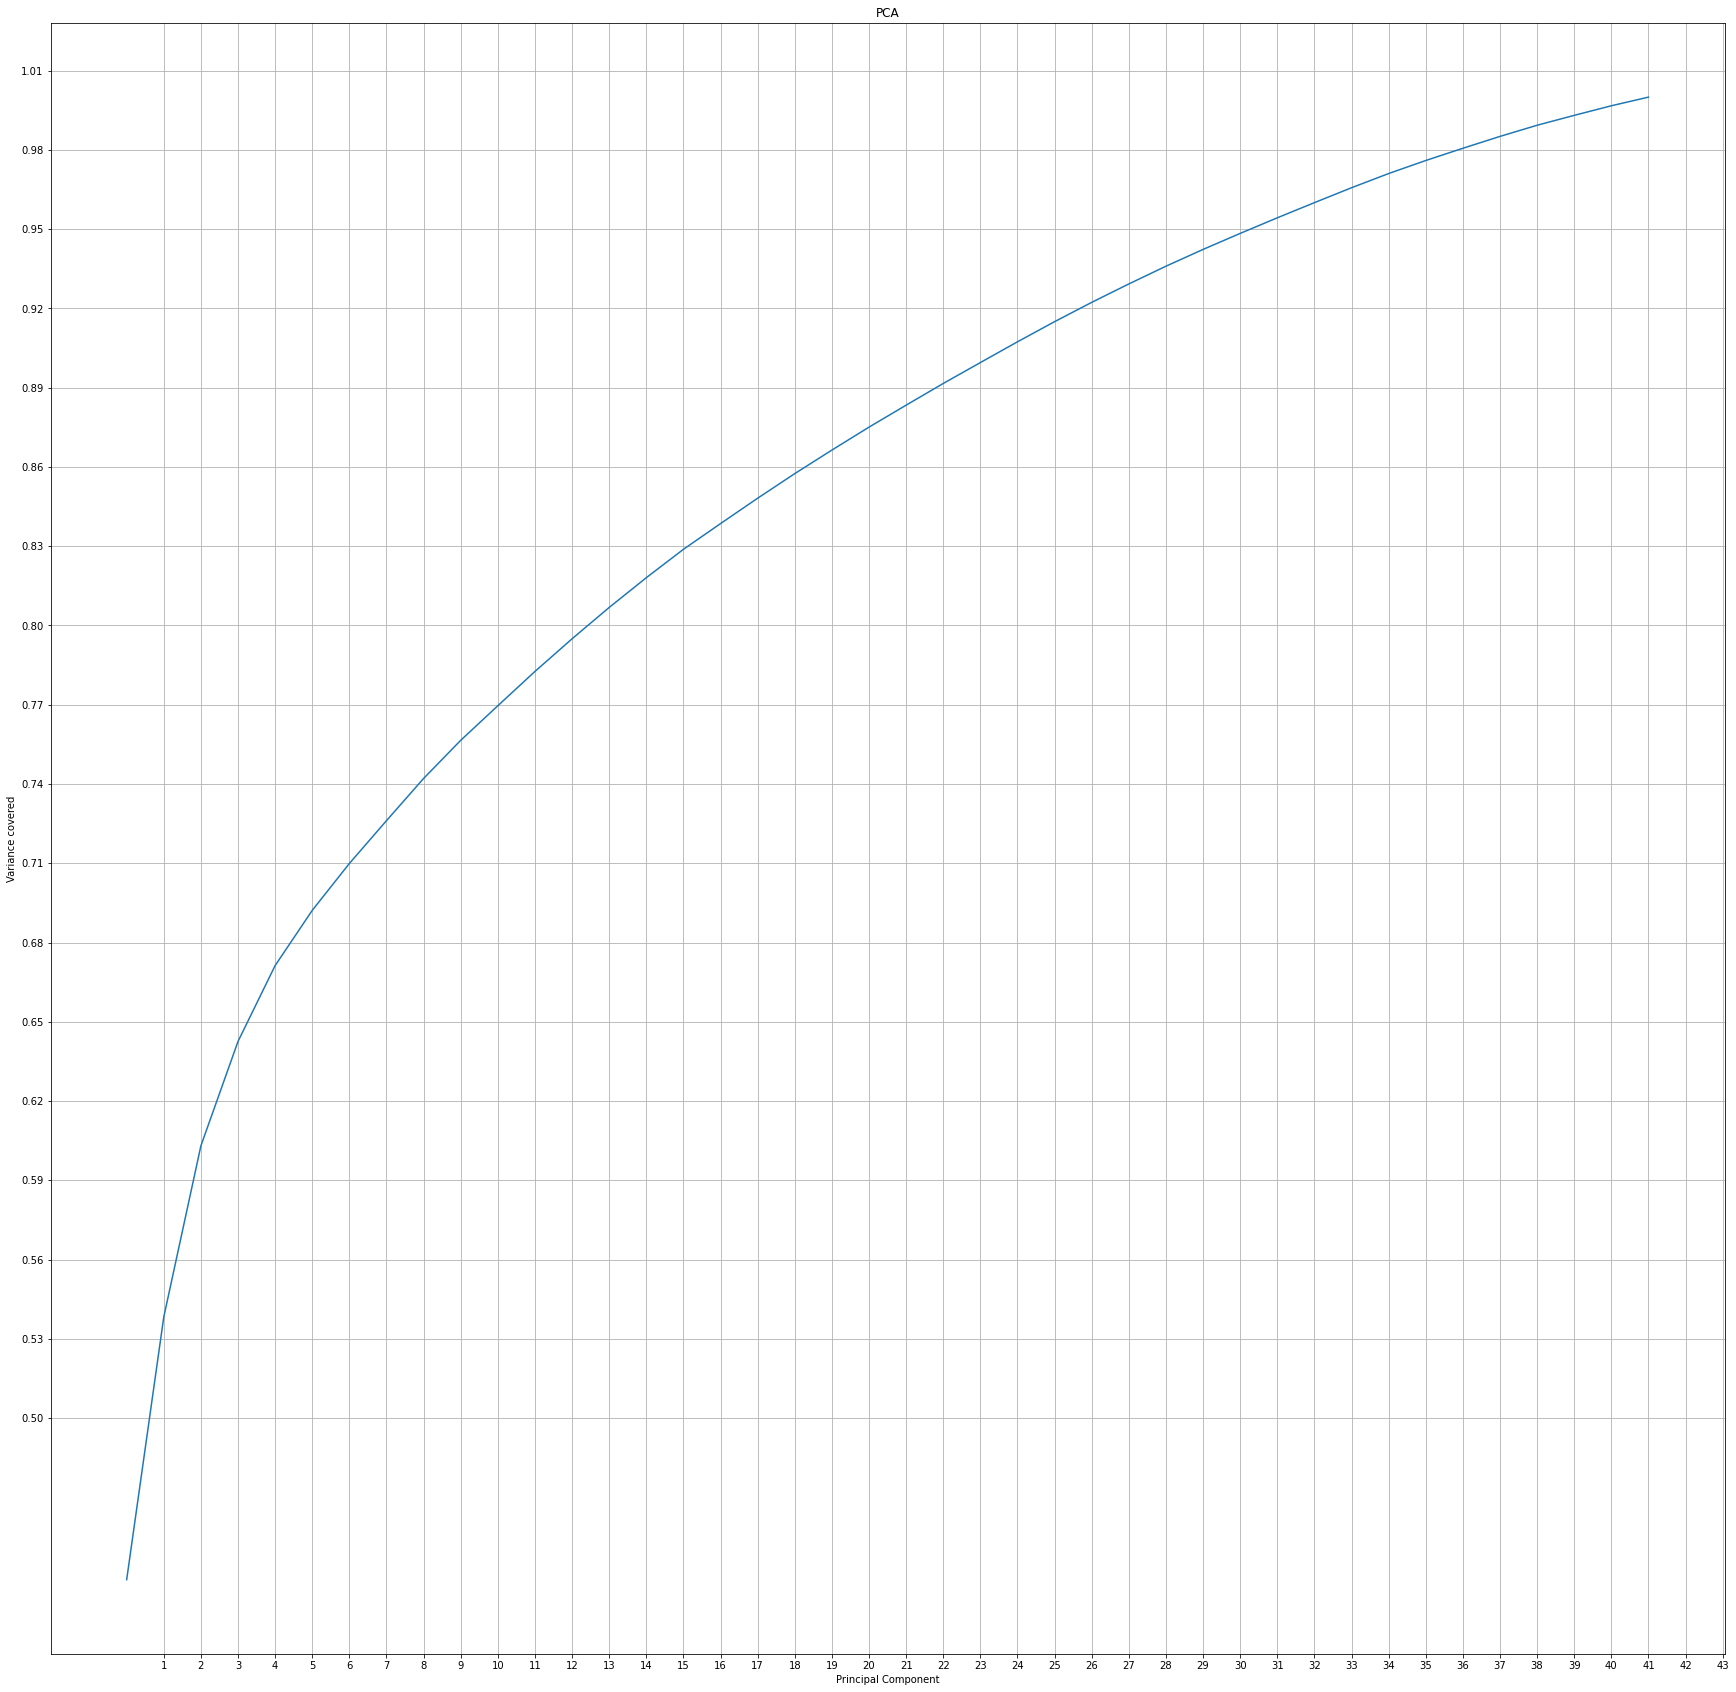

In [110]:
plt.figure(figsize=(30,30))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # np.cumsum is for cumulative of all.
plt.xlabel('Principal Component')
plt.grid('both')
plt.yticks(np.arange(0.5,1.03,0.03))
plt.xticks(range(1,44,1))
plt.ylabel('Variance covered')
plt.title("PCA")
plt.show()


As from the graph we can see 36 component can cover more than 98% of the data.

In [111]:
pca=PCA(n_components=36)
new_pcom=pca.fit_transform(x)

In [118]:
princi_comp=pd.DataFrame(new_pcom,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16',
                                          'PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                          'PC31','PC32','PC33','PC34','PC35','PC36'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,5.810073,3.027152,2.256009,-0.485212,0.368355,0.162614,-1.202692,-0.070486,-0.737569,0.248754,...,0.055694,0.609965,1.108254,0.133156,-0.807748,-0.164580,-0.344886,-0.527425,-0.128809,-0.172235
1,6.964726,1.827065,-0.115412,0.163097,-0.932768,0.519345,-0.667006,-1.117856,-1.113623,-0.258968,...,0.921303,1.144426,0.418050,-0.338515,-0.456103,1.191555,0.194874,0.172287,0.031091,-0.161458
2,-4.754347,2.228148,-0.124132,-1.878940,0.861784,0.586726,0.095272,0.136667,0.820671,0.748726,...,0.021636,0.547062,0.659601,0.101634,-0.134354,-0.269176,-0.224209,0.054251,-0.112340,0.119015
3,7.682508,1.706234,-0.447566,-0.338883,0.241467,1.185474,1.252599,-0.160077,1.756117,-0.002389,...,0.239606,-0.490620,-0.800771,0.743963,-0.434444,0.063792,-0.172552,-0.467868,0.364520,1.615086
4,-3.856159,2.817138,-0.185556,-1.464121,-0.614011,-1.481044,-0.663173,0.061313,1.124801,0.876997,...,0.037630,-0.034175,-0.581971,-0.489137,0.200835,-0.190046,0.047561,-0.283569,-0.021184,0.403044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-6.383912,-0.569915,-0.630231,0.215799,-0.249500,0.981610,0.625500,-0.539786,-0.503666,-0.190315,...,0.492509,0.961135,-1.129155,-0.288190,0.185188,0.049403,-0.279064,0.123316,-0.652569,-0.142404
567,-6.165677,-1.350103,-1.819966,0.985738,0.667420,-0.184662,1.639949,-0.965313,0.073114,-0.436168,...,0.191116,0.694750,-0.623594,-0.361558,-0.735100,0.430992,0.214500,0.472139,-0.022895,-0.587779
568,-3.267757,-2.371789,-0.797832,0.707640,-1.060076,-0.144721,1.035803,-1.438360,-1.556732,0.075522,...,0.890545,0.824254,0.449385,0.216081,-0.585419,0.108948,-0.466790,-0.229193,-0.456006,0.103393
569,5.062603,-1.319898,-1.879482,1.567996,-0.619003,-0.498315,-0.134827,0.359717,0.372815,0.564396,...,2.644898,0.613896,0.309819,0.363545,1.311255,0.258485,-0.309084,1.528934,0.424049,0.372784


In [121]:
x=princi_comp

## Modeling

In [122]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

#### Finding the best random state

In [123]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.9645906160678518 at random_state 106


#### Creating train test split

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_rs)

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [126]:
training_r2_score = []
testing_r2_score = []

In [127]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [128]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 90.58911702901443
R2_Score of LinearRegression() model on Testing Data is: 96.45906160678518

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 0.0918599200969414
Mean Square Error of LinearRegression() model is: 0.012787552325657548
Squarroot Mean Square Error  LinearRegression() model is: 0.11308206014066753

------------------------------------------------------------------------


In [129]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [130]:
alpha=lasscv.alpha_
alpha

0.006054415638332048

In [131]:
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=0.006054415638332048) model on Training Data is: 90.05368035084675
R2_Score of Lasso(alpha=0.006054415638332048) model on Testing Data is: 97.18303293607529

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.006054415638332048) model is: 0.08034454982160753
Mean Square Error of Lasso(alpha=0.006054415638332048) model is: 0.010173041643033653
Squarroot Mean Square Error  Lasso(alpha=0.006054415638332048) model is: 0.10086149732694659

------------------------------------------------------------------------


In [132]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [133]:
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.09099999999999998) model on Training Data is: 90.58911603358848
R2_Score of Ridge(alpha=0.09099999999999998) model on Testing Data is: 96.46102251105961

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.09099999999999998) model is: 0.0918345585497223
Mean Square Error of Ridge(alpha=0.09099999999999998) model is: 0.012780470822612229
Squarroot Mean Square Error  Ridge(alpha=0.09099999999999998) model is: 0.1130507444584609

------------------------------------------------------------------------


In [134]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 96.53866698144769
R2_Score of SVR() model on Testing Data is: 97.53879586446446

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 0.07413738640387964
Mean Square Error of SVR() model is: 0.008888258752988758
Squarroot Mean Square Error  SVR() model is: 0.09427756229871855

------------------------------------------------------------------------


In [135]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 98.09173234406259
R2_Score of RandomForestRegressor() model on Testing Data is: 98.70634782239044

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 0.04696232558139516
Mean Square Error of RandomForestRegressor() model is: 0.00467182511395347
Squarroot Mean Square Error  RandomForestRegressor() model is: 0.06835075064659839

------------------------------------------------------------------------


In [136]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 99.8592536245359
R2_Score of GradientBoostingRegressor() model on Testing Data is: 98.7940736634988

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 0.04430364612268309
Mean Square Error of GradientBoostingRegressor() model is: 0.004355016782683144
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 0.06599255096359849

------------------------------------------------------------------------


In [137]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 96.5592899818499

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 0.053011627906976756
Mean Square Error of DecisionTreeRegressor() model is: 0.012425593023255813
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 0.11147014408914978

------------------------------------------------------------------------


In [138]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 97.091501009596
R2_Score of AdaBoostRegressor() model on Testing Data is: 96.06384958532443

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 0.09705332638908898
Mean Square Error of AdaBoostRegressor() model is: 0.014214799524830062
Squarroot Mean Square Error  AdaBoostRegressor() model is: 0.11922583413350507

------------------------------------------------------------------------


In [139]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.99993047735082
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [140]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','AdaBoostRegressor','XGBRegressor']

In [141]:
df2 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df2

,Algorithms,Training R2 Score,Testing R2 Score
0,LinearRegression,90.589117,96.459062
1,Lasso,90.053680,97.183033
2,Ridge,90.589116,96.461023
3,SVR,96.538667,97.538796
4,RandomForestRegressor,98.091732,98.706348
5,GradientBoostingRegressor,99.859254,98.794074
6,DecisionTreeRegressor,100.000000,96.559290
7,AdaBoostRegressor,97.091501,96.063850
8,XGBRegressor,99.999930,98.586184


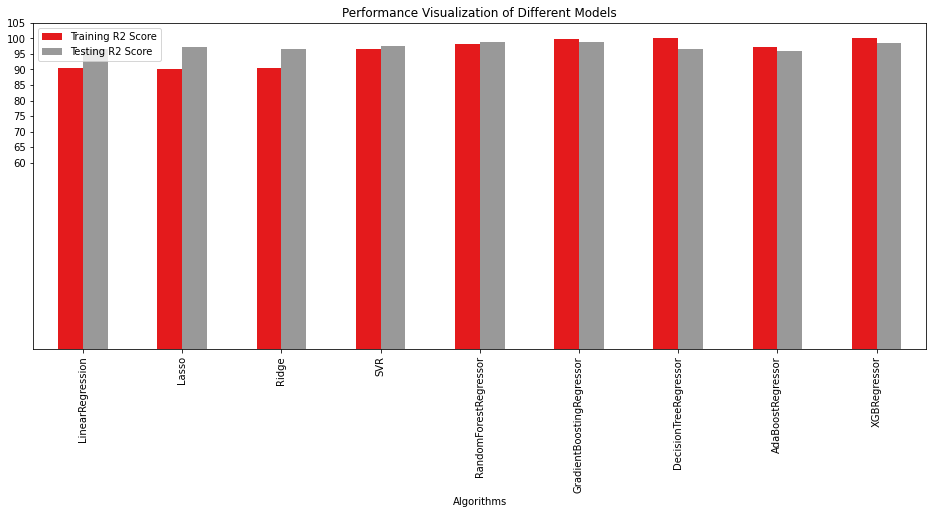

In [142]:
df2.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

### Cross validation score

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.87703891 0.91727192 0.89891072 0.90655303 0.8402359 ]
0.8880020940873994
Differnet between Accuracy score and cross validation score is-  0.0765885219804524


In [145]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[0.74612569 0.75993278 0.72832106 0.80640245 0.6985053 ]
0.7478574561279437
Differnet between Accuracy score and cross validation score is-  0.22397287323280923


In [146]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.87723728 0.91736656 0.89905059 0.90717806 0.84035164]
0.8882368263592223
Differnet between Accuracy score and cross validation score is-  0.07637339875137383


In [147]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[0.8823879  0.93392813 0.92417136 0.96344111 0.87263178]
0.9153120566631749
Differnet between Accuracy score and cross validation score is-  0.060075901981469615


In [148]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.89682465 0.91106665 0.88999811 0.97590341 0.84911993]
0.9045825499470188
Differnet between Accuracy score and cross validation score is-  0.08248092827688558


In [149]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.91369433 0.90151445 0.93628884 0.96781794 0.84596711]
0.9130565338944574
Differnet between Accuracy score and cross validation score is-  0.07488420274053065


In [150]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.88563766 0.73112888 0.87681377 0.98160674 0.74658298]
0.8443540073931637
Differnet between Accuracy score and cross validation score is-  0.12123889242533537


In [151]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.88912928 0.95936064 0.90691121 0.94625412 0.83528155]
0.9073873582493052
Differnet between Accuracy score and cross validation score is-  0.05325113760393918


In [152]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.89660778 0.83785006 0.92499693 0.97208835 0.81221398]
0.8887514207842964
Differnet between Accuracy score and cross validation score is-  0.09711042270278447


GradientBoostingRegressor and XGBRegressor are best performing models

### Hyper parameter tuning

In [153]:
from sklearn.model_selection import GridSearchCV

#### GradientBoostingRegressor

In [154]:
model1=GradientBoostingRegressor()

In [155]:
param_grid={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'learning_rate':[.001,.005,.01,.03],
           'n_estimators':[50,100,150],
           'criterion':['friedman_mse', 'squared_error']}

In [156]:
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.005, 0.01, 0.03],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150]})

In [157]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'n_estimators': 150}

In [158]:
model_prediction(GradientBoostingRegressor(criterion='friedman_mse',
 learning_rate= 0.03,
 loss= 'squared_error',
 n_estimators= 150))

R2_Score of GradientBoostingRegressor(learning_rate=0.03, n_estimators=150) model on Training Data is: 99.49460723258461
R2_Score of GradientBoostingRegressor(learning_rate=0.03, n_estimators=150) model on Testing Data is: 98.58960647927216

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor(learning_rate=0.03, n_estimators=150) model is: 0.04783520914208307
Mean Square Error of GradientBoostingRegressor(learning_rate=0.03, n_estimators=150) model is: 0.005093418451062407
Squarroot Mean Square Error  GradientBoostingRegressor(learning_rate=0.03, n_estimators=150) model is: 0.07136818934975446

------------------------------------------------------------------------


In [159]:
m=GradientBoostingRegressor(criterion= 'friedman_mse',learning_rate= 0.03,loss= 'squared_error',n_estimators=150)
m.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, n_estimators=150)

#### XGBRegressor

In [160]:
model2=XGBRegressor()

In [161]:
param_grid={'max_depth':[3,4,5,6,7],
           'gamma':[.01,.02,.1,.2],
           'min_child_weight':[4,5,6],
           'n_estimators':[50,100,150]}

In [162]:
grid_search = GridSearchCV(model2, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.01, 0.02, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [50, 100, 150]})

In [163]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 50}

In [164]:
model_prediction(XGBRegressor(gamma= 0.01, max_depth= 4, min_child_weight= 6, n_estimators= 100))

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.75803302066151
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
            

## Saving the model

In [165]:
import pickle
filename='Grade.pkl'
pickle.dump(m,open(filename,'wb'))#saved model

In [166]:
loaded_model=pickle.load(open('Grade.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.70948869352455


In [167]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predicted,3.720122,3.833961,3.285445,3.094817,2.295254,3.105588,2.757365,2.98635,3.024648,3.758833,...,2.053294,1.903147,2.603246,2.229417,1.881355,2.625379,3.346808,2.944776,3.210196,3.304973
Original,3.721000,3.873000,3.290000,3.137000,2.352000,3.044000,2.763000,3.01700,3.023000,3.840000,...,2.056000,1.886000,2.612000,2.300000,1.753000,2.659000,3.679000,2.917000,3.226000,3.318000
